## Latent Dirichlet Allocation (LDA)

In [1]:
pip install spacy

In [2]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [4]:
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
def lemmatize(docs, allowed_postags = ["NOUN","ADJ","VERB","ADV"]):
    #nlp = spacy.load("en_core_web_sm", disable = ["parser","ner"])
    nlp = en_core_web_md.load(disable=['parser', 'ner'])
    lemmatized_docs = []
    for doc in docs:
        doc = nlp(doc)
        tokens = []
        for token in doc:
            if token.pos_ in allowed_postags:
                tokens.append(token.lemma_)
        lemmatized_docs.append(" ".join(tokens))
    return (lemmatized_docs)

In [6]:
def tokenize(docs):
    tokenized_docs = []
    for doc in docs:
        tokens = gensim.utils.simple_preprocess(doc,deacc=True)
        tokenized_docs.append(tokens)
    return (tokenized_docs)

In [7]:
# Fetch 20newsgropus dataset
docs = fetch_20newsgroups(subset='all',remove=('headers','footers','quotes'))

# Pre-process input: lemmatization and tokenization
lemmatized_docs = lemmatize(docs)
tokenized_docs = tokenize(lemmatized_docs)

# Mapping from word IDs to words
id2word = corpora.Dictionary(tokenized_docs)

# Prepare Document-Term Matrix
corpus = []
for doc in tokenized_docs:
    corpus.append(id2word.doc2bow(doc))

In [8]:
# Fit LDA model: See [1] for more details
topic_model = gensim.models.ldamodel.LdaModel(
    corpus = corpus,      # Document-Term Matrix
    id2word = id2word,    # Map word IDs to words
    num_topics = 30,      # Number of latent topics to extract
    random_state = 100,
    passes = 100,         # N° of passes through the corpus during training
    )

In [9]:
# Visualize with pyLDAvis: See [2] for more details
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(
    topic_model, 
    corpus,
    id2word, 
    mds = "mmds", 
    R = 30)

visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
25     0.154809 -0.142876       1        1  21.666657
4      0.211778  0.166007       2        1  11.666665
13    -0.187742  0.190961       3        1  11.666665
14    -0.209383 -0.169007       4        1  11.666665
0      0.001175 -0.001734       5        1   1.666667
17     0.001175 -0.001734       6        1   1.666667
28     0.001175 -0.001734       7        1   1.666667
27     0.001175 -0.001734       8        1   1.666667
26     0.001175 -0.001734       9        1   1.666667
24     0.001175 -0.001734      10        1   1.666667
23     0.001175 -0.001734      11        1   1.666667
22     0.001175 -0.001734      12        1   1.666667
21     0.001175 -0.001734      13        1   1.666667
20     0.001175 -0.001734      14        1   1.666667
19     0.001175 -0.001734      15        1   1.666667
18     0.001175 -0.001734      16        1   1.666667
15     0.001175 -0.001734      17        1   1.666667
16     0.001175 -0.001734      18        1   1.666667
1      0.001175 -0.001734      19        1   1.666667
12     0.001175 -0.001734      20        1   1.666667
11     0.001175 -0.001734      21        1   1.666667
10     0.001175 -0.001734      22        1   1.666667
9      0.001175 -0.001734      23        1   1.666667
8      0.001175 -0.001734      24        1   1.666667
7      0.001175 -0.001734      25        1   1.666667
6      0.001175 -0.001734      26        1   1.666667
5      0.001175 -0.001734      27        1   1.666667
3      0.001175 -0.001734      28        1   1.666667
2      0.001175 -0.001734      29        1   1.666667
29     0.001175 -0.001734      30        1   1.666667, topic_info=           Term      Freq  Total Category  logprob  loglift
1      filename  1.000000    1.0  Default   5.0000      5.0
2   target_name  1.000000    1.0  Default   4.0000      4.0
4         descr  1.000000    1.0  Default   3.0000      3.0
0         datum  0.000000    0.0  Default   2.0000      2.0
3        target  0.000000    0.0  Default   1.0000      1.0
..          ...       ...    ...      ...      ...      ...
0         datum  0.016667    1.0  Topic30  -1.6094      0.0
3        target  0.016667    1.0  Topic30  -1.6094      0.0
2   target_name  0.016667    1.0  Topic30  -1.6094     -0.0
4         descr  0.016667    1.0  Topic30  -1.6094     -0.0
1      filename  0.016667    1.0  Topic30  -1.6094     -0.0

[155 rows x 6 columns], token_table=      Topic  Freq         Term
term                          
0         1   1.0        datum
4         2   1.0        descr
1         4   1.0     filename
3         1   1.0       target
2         3   1.0  target_name, R=5, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 5, 14, 15, 1, 18, 29, 28, 27, 25, 24, 23, 22, 21, 20, 19, 16, 17, 2, 13, 12, 11, 10, 9, 8, 7, 6, 4, 3, 30])

In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
news_df = pd.DataFrame({'News': docs.data,'Target': docs.target})
news_df['Target_name'] = news_df['Target'].apply(lambda x: docs.target_names[x])

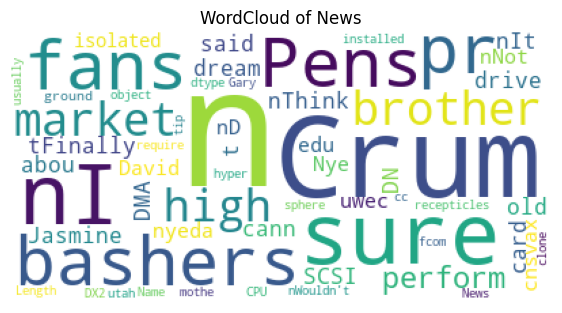

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(news_df['News']))
fig = plt.figure(figsize=[7,10])
plt.title('WordCloud of News')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Latent Semantic Analysis (LSA) / Probabilistic LSA

In [13]:
import pandas as pd
df = pd.read_csv(r'D:\Musical_instruments_reviews.csv',usecols=['reviewerID','reviewText'])
df.head()

,reviewerID,reviewText
0,A2IBPI20UZIR0U,"Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,The product does exactly as it should and is q...
2,A195EZSQDW3E21,The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,This pop filter is great. It looks and perform...


In [14]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, preprocess_string, strip_short, stem_text

# preprocess given text
def preprocess(text):
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short, 
                                stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    return text

df['reviewText'] = df['reviewText'].astype(str)
df['cleanText'] = df['reviewText'].apply(preprocess)

In [15]:
df.head()

,reviewerID,reviewText,cleanText
0,A2IBPI20UZIR0U,"Not much to write about here, but it does exac...","[write, here, exactli, suppos, filter, pop, so..."
1,A14VAT5EAX3D9S,The product does exactly as it should and is q...,"[product, exactli, afford, realiz, doubl, scre..."
2,A195EZSQDW3E21,The primary job of this device is to block the...,"[primari, job, devic, block, breath, produc, p..."
3,A2C00NNG1ZQQG2,Nice windscreen protects my MXL mic and preven...,"[nice, windscreen, protect, mxl, mic, prevent,..."
4,A94QU4C90B1AX,This pop filter is great. It looks and perform...,"[pop, filter, great, look, perform, like, stud..."


In [16]:
from gensim import corpora

corpus = df['cleanText']
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

In [17]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

for i in range(2,11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['cleanText'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score))

Coherence score with 2 clusters: 0.46397612404018246
Coherence score with 3 clusters: 0.43820466295871235
Coherence score with 4 clusters: 0.44420604782595124
Coherence score with 5 clusters: 0.4066937586887029
Coherence score with 6 clusters: 0.39378977870984305
Coherence score with 7 clusters: 0.43012323971727934
Coherence score with 8 clusters: 0.3879989398048682
Coherence score with 9 clusters: 0.3469619168534984
Coherence score with 10 clusters: 0.3656920668801378


In [18]:
lsi = LsiModel(bow, num_topics=2, id2word=dictionary)

In [19]:
corpus_lsi = lsi[bow]
score1 = []
score2 = []
for doc in corpus_lsi:
    score1.append(round(doc[0][1],2))
    score2.append(round(doc[1][1],2))

# create data frame that shows scores assigned for both topics for each review
df_topic = pd.DataFrame()
df_topic['Text'] = df['reviewText']
df_topic['Topic 0 score'] = score1
df_topic['Topic 1 score'] = score2
df_topic['Topic']= df_topic[['Topic 0 score', 'Topic 1 score']].apply(lambda x: x.argmax(), axis=1)
df_topic.head(1)

,Text,Topic 0 score,Topic 1 score,Topic
0,"Not much to write about here, but it does exac...",0.88,-0.22,0


In [20]:
df_topic0 = df_topic[df_topic['Topic']==0]
df_topic1 = df_topic[df_topic['Topic']==1]
print('Sample text from topic 0:\n {}'.format(df_topic0.sample(1, random_state=2)['Text'].values))
print('\nSample text from topic 1:\n {}'.format(df_topic1.sample(1, random_state=2)['Text'].values))

Sample text from topic 0:
 ['What can one say about a cable?They are intended to transmit electrical impulse with the least amount in interference and this one does a superb job of just that.Why I have been thinking of replacing all of my other cables with additional cables just like this one, only slightly longer or a good deal shorter depending on the intended function.']

Sample text from topic 1:
 ["For the money there isn't a better tuner on the market today.  This is the newer version which some have complained about the tuning lines being thicker, really?  This tuner is s[pot on every time and super fast.  You can move from string to string quick."]


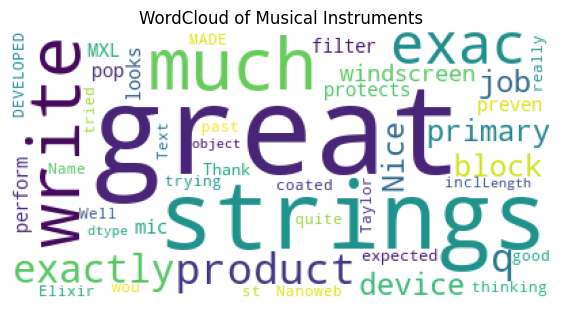

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white',
                      max_words=200).generate(str(df_topic['Text']))
fig = plt.figure(figsize=[7,10])
plt.title('WordCloud of Musical Instruments')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()